# Proficiency Test

#### NAME : RAMZY MOHAMMAD
#### IYKRA DATA FELLOWSHIP BATCH 6

# Scenario
Tersedia data seputar kriminalitas dan dapat diunduh melalui link berikut ini:
https://github.com/Syukrondzeko/Crime-Dataset
Terdapat 3 crime dataset yang dipartisi berdasarkan tahun kejadian (2018, 2019,
dan 2020). Peserta dapat melakukan pengolahan di ketiga data tersebut dengan
terlebih dahulu digabungkan menjadi 1 dataset. Tersedia juga data dictionary dan
value dictionary untuk menunjang pengolahan data. Untuk memperkaya analisis,
peserta dapat menambahkan data atau informasi tambahan yang relevan.
Selanjutnya peserta dapat mulai mengerjakan soal-soal berikut ini secara

# DATASET


Dataset berisikan data tentang catatan kriminal pada tahun 2018-2020, berikut fitur-fiturnya:

- INCIDENT NUMBER
- OFFENSE_CODE
- OFFENSE_CODE_GROUP
- OFFENSE_DESCRIPTION
- DISTRICT
- REPORTING AREA
- SHOOTING
- OCCURRED_DATE
- YEAR
- MONTH
- DAY_OF_WEEK
- HOUR
- UCR_PART
- STREET
- Lat
- Long
- Location

# IMPORT DATA

In [185]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

from sklearn.impute import SimpleImputer


from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

In [186]:
crime2018 = pd.read_csv("Crime2018.csv")
crime2019 = pd.read_csv("Crime2019.csv")
crime2020 = pd.read_csv("Crime2020.csv")

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [187]:
crime = crime2018.append(crime2019)
crime = crime.append(crime2020)

# DATA PREPROCESSING

In [188]:
crime.isna().sum()/len(crime)*100

INCIDENT_NUMBER         0.000000
OFFENSE_CODE            0.000000
OFFENSE_CODE_GROUP     47.833977
OFFENSE_DESCRIPTION     0.000000
DISTRICT                0.547045
REPORTING_AREA          0.000000
SHOOTING               51.953958
OCCURRED_ON_DATE        0.000000
YEAR                    0.000000
MONTH                   0.000000
DAY_OF_WEEK             0.000000
HOUR                    0.000000
UCR_PART               47.844527
STREET                  0.852483
Lat                     3.391467
Long                    3.391467
Location                0.000000
dtype: float64

In [189]:
crime = crime.drop(columns=['OFFENSE_CODE_GROUP', 'SHOOTING', 'UCR_PART', 'OFFENSE_CODE','REPORTING_AREA', 
                          'STREET', 'Lat', 'Long', 'Location', 'OCCURRED_ON_DATE'])

In [190]:
crime.isna().sum()/len(crime)*100

INCIDENT_NUMBER        0.000000
OFFENSE_DESCRIPTION    0.000000
DISTRICT               0.547045
YEAR                   0.000000
MONTH                  0.000000
DAY_OF_WEEK            0.000000
HOUR                   0.000000
dtype: float64

In [191]:
crime = crime[crime.DISTRICT !='External']

In [192]:
crime

,INCIDENT_NUMBER,OFFENSE_DESCRIPTION,DISTRICT,YEAR,MONTH,DAY_OF_WEEK,HOUR
0,I192077559,INVESTIGATE PERSON,B3,2018,4,Monday,9
1,I192077332,LARCENY ALL OTHERS,E18,2018,3,Tuesday,8
2,I192076660,HARASSMENT,E5,2018,10,Wednesday,12
3,I192075386,HARASSMENT,A1,2018,4,Monday,8
4,I192075335,PROPERTY - MISSING,D4,2018,1,Monday,0
...,...,...,...,...,...,...,...
70889,20063425,INVESTIGATE PROPERTY,A7,2020,9,Tuesday,0
70890,20062356,FRAUD - IMPERSONATION,E18,2020,8,Friday,18
70891,20046400,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,B2,2020,7,Thursday,1
70892,20038446,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,B2,2020,6,Wednesday,1


In [193]:
crime.OFFENSE_DESCRIPTION.unique()

array(['INVESTIGATE PERSON', 'LARCENY ALL OTHERS', 'HARASSMENT',
       'PROPERTY - MISSING', 'FRAUD - IMPERSONATION', 'AUTO THEFT',
       'FORGERY / COUNTERFEITING', 'FRAUD - CREDIT CARD / ATM FRAUD',
       'BURGLARY - COMMERICAL - NO FORCE',
       'FRAUD - FALSE PRETENSE / SCHEME', 'FRAUD - WIRE',
       'PROPERTY - LOST', 'VANDALISM', 'LARCENY THEFT FROM BUILDING',
       'OTHER OFFENSE', 'MISSING PERSON',
       'SERVICE TO OTHER PD INSIDE OF MA.', 'M/V PLATES - LOST',
       'BURGLARY - RESIDENTIAL - NO FORCE', 'ASSAULT SIMPLE - BATTERY',
       'PROPERTY - FOUND', 'LARCENY THEFT FROM MV - NON-ACCESSORY',
       'LARCENY THEFT OF MV PARTS & ACCESSORIES',
       'SICK/INJURED/MEDICAL - PERSON', 'M/V ACCIDENT - PROPERTY DAMAGE',
       'ASSAULT - AGGRAVATED - BATTERY', 'LANDLORD - TENANT SERVICE',
       'THREATS TO DO BODILY HARM', 'ASSAULT - SIMPLE',
       'M/V - LEAVING SCENE - PROPERTY DAMAGE',
       'M/V - LEAVING SCENE - PERSONAL INJURY',
       'LARCENY THEFT OF BICYCLE'

In [194]:
imp_mode = SimpleImputer(strategy='most_frequent')
crime[['DISTRICT']] = imp_mode.fit_transform(crime[['DISTRICT']])

In [195]:
crime.isna().sum()

INCIDENT_NUMBER        0
OFFENSE_DESCRIPTION    0
DISTRICT               0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
dtype: int64

In [196]:
a = list(crime.DISTRICT)

In [197]:
huruf = []
for i in a:
    z = str(i)
    huruf.append(z[:1])

In [198]:
huruf

['B',
 'E',
 'E',
 'A',
 'D',
 'E',
 'B',
 'B',
 'D',
 'C',
 'C',
 'B',
 'E',
 'A',
 'C',
 'D',
 'E',
 'D',
 'B',
 'C',
 'B',
 'A',
 'D',
 'B',
 'B',
 'C',
 'B',
 'E',
 'D',
 'B',
 'B',
 'C',
 'B',
 'B',
 'A',
 'B',
 'B',
 'C',
 'E',
 'D',
 'E',
 'D',
 'B',
 'A',
 'D',
 'E',
 'E',
 'B',
 'B',
 'B',
 'D',
 'B',
 'A',
 'A',
 'C',
 'B',
 'C',
 'B',
 'B',
 'A',
 'B',
 'A',
 'A',
 'D',
 'C',
 'E',
 'B',
 'C',
 'A',
 'B',
 'A',
 'C',
 'A',
 'E',
 'B',
 'E',
 'E',
 'B',
 'C',
 'E',
 'E',
 'E',
 'D',
 'D',
 'E',
 'E',
 'A',
 'D',
 'E',
 'C',
 'B',
 'C',
 'A',
 'C',
 'B',
 'C',
 'C',
 'D',
 'A',
 'E',
 'C',
 'E',
 'E',
 'E',
 'E',
 'B',
 'B',
 'C',
 'E',
 'B',
 'B',
 'A',
 'B',
 'D',
 'B',
 'B',
 'A',
 'B',
 'B',
 'C',
 'A',
 'B',
 'D',
 'E',
 'C',
 'B',
 'C',
 'E',
 'C',
 'D',
 'D',
 'E',
 'D',
 'C',
 'A',
 'D',
 'B',
 'A',
 'E',
 'D',
 'B',
 'D',
 'D',
 'A',
 'A',
 'D',
 'C',
 'B',
 'B',
 'C',
 'B',
 'C',
 'B',
 'C',
 'B',
 'B',
 'B',
 'C',
 'C',
 'C',
 'C',
 'A',
 'B',
 'D',
 'B',
 'B',
 'B'

In [199]:
crime['district'] = huruf

In [200]:
crime

,INCIDENT_NUMBER,OFFENSE_DESCRIPTION,DISTRICT,YEAR,MONTH,DAY_OF_WEEK,HOUR,district
0,I192077559,INVESTIGATE PERSON,B3,2018,4,Monday,9,B
1,I192077332,LARCENY ALL OTHERS,E18,2018,3,Tuesday,8,E
2,I192076660,HARASSMENT,E5,2018,10,Wednesday,12,E
3,I192075386,HARASSMENT,A1,2018,4,Monday,8,A
4,I192075335,PROPERTY - MISSING,D4,2018,1,Monday,0,D
...,...,...,...,...,...,...,...,...
70889,20063425,INVESTIGATE PROPERTY,A7,2020,9,Tuesday,0,A
70890,20062356,FRAUD - IMPERSONATION,E18,2020,8,Friday,18,E
70891,20046400,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,B2,2020,7,Thursday,1,B
70892,20038446,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,B2,2020,6,Wednesday,1,B


In [201]:
crime['offense_description'] = crime['OFFENSE_DESCRIPTION'].str.split('-').str[0]
crime

,INCIDENT_NUMBER,OFFENSE_DESCRIPTION,DISTRICT,YEAR,MONTH,DAY_OF_WEEK,HOUR,district,offense_description
0,I192077559,INVESTIGATE PERSON,B3,2018,4,Monday,9,B,INVESTIGATE PERSON
1,I192077332,LARCENY ALL OTHERS,E18,2018,3,Tuesday,8,E,LARCENY ALL OTHERS
2,I192076660,HARASSMENT,E5,2018,10,Wednesday,12,E,HARASSMENT
3,I192075386,HARASSMENT,A1,2018,4,Monday,8,A,HARASSMENT
4,I192075335,PROPERTY - MISSING,D4,2018,1,Monday,0,D,PROPERTY
...,...,...,...,...,...,...,...,...,...
70889,20063425,INVESTIGATE PROPERTY,A7,2020,9,Tuesday,0,A,INVESTIGATE PROPERTY
70890,20062356,FRAUD - IMPERSONATION,E18,2020,8,Friday,18,E,FRAUD
70891,20046400,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,B2,2020,7,Thursday,1,B,WEAPON VIOLATION
70892,20038446,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,B2,2020,6,Wednesday,1,B,WEAPON VIOLATION


In [202]:
crime['offense_description'] = crime['offense_description'].str.split('/').str[0]
crime

,INCIDENT_NUMBER,OFFENSE_DESCRIPTION,DISTRICT,YEAR,MONTH,DAY_OF_WEEK,HOUR,district,offense_description
0,I192077559,INVESTIGATE PERSON,B3,2018,4,Monday,9,B,INVESTIGATE PERSON
1,I192077332,LARCENY ALL OTHERS,E18,2018,3,Tuesday,8,E,LARCENY ALL OTHERS
2,I192076660,HARASSMENT,E5,2018,10,Wednesday,12,E,HARASSMENT
3,I192075386,HARASSMENT,A1,2018,4,Monday,8,A,HARASSMENT
4,I192075335,PROPERTY - MISSING,D4,2018,1,Monday,0,D,PROPERTY
...,...,...,...,...,...,...,...,...,...
70889,20063425,INVESTIGATE PROPERTY,A7,2020,9,Tuesday,0,A,INVESTIGATE PROPERTY
70890,20062356,FRAUD - IMPERSONATION,E18,2020,8,Friday,18,E,FRAUD
70891,20046400,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,B2,2020,7,Thursday,1,B,WEAPON VIOLATION
70892,20038446,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,B2,2020,6,Wednesday,1,B,WEAPON VIOLATION


In [203]:
crime['offense_description'] = crime['offense_description'].str.lower()

In [204]:
crime.drop_duplicates(inplace=True)

In [205]:
crime["offense_description"].replace({"m": "motor vehicle accident"}, inplace=True)

In [206]:
huruf = []
for i in crime['offense_description']:
    huruf.append(i.rstrip())

In [207]:
crime['offense_description'] = huruf
crime

,INCIDENT_NUMBER,OFFENSE_DESCRIPTION,DISTRICT,YEAR,MONTH,DAY_OF_WEEK,HOUR,district,offense_description
0,I192077559,INVESTIGATE PERSON,B3,2018,4,Monday,9,B,investigate person
1,I192077332,LARCENY ALL OTHERS,E18,2018,3,Tuesday,8,E,larceny all others
2,I192076660,HARASSMENT,E5,2018,10,Wednesday,12,E,harassment
3,I192075386,HARASSMENT,A1,2018,4,Monday,8,A,harassment
4,I192075335,PROPERTY - MISSING,D4,2018,1,Monday,0,D,property
...,...,...,...,...,...,...,...,...,...
70889,20063425,INVESTIGATE PROPERTY,A7,2020,9,Tuesday,0,A,investigate property
70890,20062356,FRAUD - IMPERSONATION,E18,2020,8,Friday,18,E,fraud
70891,20046400,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,B2,2020,7,Thursday,1,B,weapon violation
70892,20038446,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,B2,2020,6,Wednesday,1,B,weapon violation


In [209]:
crime.drop(columns=['OFFENSE_DESCRIPTION'], inplace=True)

# ------------------------------------------------------------------------------------------------------------

# SOAL-SOAL PYTHON 

## Nomer 1

In [137]:
crime.groupby(by=['district']).count()[['offense_description']].sort_values(by=['offense_description'], ascending=False)

,offense_description
district,
B,51366
C,38708
D,36530
A,32270
E,30209


**District B memiliki tindak kriminal yang paling tinggi.**

## Nomer 2

In [138]:
df2020 = crime[crime['YEAR'] == 2020]
df2020 = df2020[['offense_description']]
df2020

,offense_description
0,investigate person
1,investigate person
2,fraud
3,fraud
4,harassment
...,...
70889,investigate property
70890,fraud
70891,weapon violation
70892,weapon violation


In [139]:
df2019 = crime[crime['YEAR'] == 2019]
df2019 = df2019[['offense_description']]
df2019

,offense_description
0,warrant arrest
1,fraud
2,fraud
3,assault
4,fraud
...,...
19777,fraud
19778,verbal dispute
19779,val
19780,investigate person


In [140]:
df = df2020.merge(df2019, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']

df.offense_description.value_counts()

explosives                    40
obscene phone calls            6
truancy                        6
justifiable homicide           1
evidence tracker incidents     1
Name: offense_description, dtype: int64

**`Explosives, obscene phone calls, dan truancy` adalah 3 tindak kriminal yang terjadi di tahun 2020 dan tidak terhadi di tahun 2019**

## Nomer 4

In [141]:
crime

,INCIDENT_NUMBER,YEAR,MONTH,DAY_OF_WEEK,HOUR,district,offense_description
0,I192077559,2018,4,Monday,9,B,investigate person
1,I192077332,2018,3,Tuesday,8,E,larceny all others
2,I192076660,2018,10,Wednesday,12,E,harassment
3,I192075386,2018,4,Monday,8,A,harassment
4,I192075335,2018,1,Monday,0,D,property
...,...,...,...,...,...,...,...
70889,20063425,2020,9,Tuesday,0,A,investigate property
70890,20062356,2020,8,Friday,18,E,fraud
70891,20046400,2020,7,Thursday,1,B,weapon violation
70892,20038446,2020,6,Wednesday,1,B,weapon violation


In [149]:
crime_akhir_pekan = crime[(crime['DAY_OF_WEEK']=='Saturday') | (crime['DAY_OF_WEEK']=='Sunday')]
crime_akhir_pekan

,INCIDENT_NUMBER,YEAR,MONTH,DAY_OF_WEEK,HOUR,district,offense_description
6,I192074718,2018,11,Sunday,9,B,fraud
18,I192070988,2018,9,Saturday,9,B,fraud
29,I192065214,2018,8,Sunday,0,B,property
30,I192063757,2018,12,Saturday,15,B,larceny all others
37,I192061025,2018,9,Saturday,0,C,motor vehicle accident
...,...,...,...,...,...,...,...
70881,182051106,2020,11,Sunday,0,B,warrant arrest
70882,122043183,2020,6,Saturday,9,C,trespassing
70884,120200885,2020,2,Sunday,10,B,larceny theft from mv
70885,120200242,2020,1,Sunday,0,D,investigate person


In [150]:
crime_akhir_pekan.groupby(by=['district']).count()[['offense_description']].sort_values(by=['offense_description'], ascending=False)

,offense_description
district,
B,13500
C,10278
D,9813
A,8818
E,7572


**Paling banyak tindak kriminal terjadi di district "B" pada akhir pekan**

## Nomer 5

In [151]:
crime_hari_kerja = crime[(crime['DAY_OF_WEEK'] !='Saturday') & (crime['DAY_OF_WEEK'] !='Sunday')]
crime_hari_kerja

,INCIDENT_NUMBER,YEAR,MONTH,DAY_OF_WEEK,HOUR,district,offense_description
0,I192077559,2018,4,Monday,9,B,investigate person
1,I192077332,2018,3,Tuesday,8,E,larceny all others
2,I192076660,2018,10,Wednesday,12,E,harassment
3,I192075386,2018,4,Monday,8,A,harassment
4,I192075335,2018,1,Monday,0,D,property
...,...,...,...,...,...,...,...
70888,20202856,2020,3,Thursday,8,B,sick
70889,20063425,2020,9,Tuesday,0,A,investigate property
70890,20062356,2020,8,Friday,18,E,fraud
70891,20046400,2020,7,Thursday,1,B,weapon violation


In [152]:
crime_hari_kerja.DAY_OF_WEEK.unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
      dtype=object)

In [153]:
crime_hari_kerja.groupby(by=['district']).count()[['offense_description']].sort_values(by=['offense_description'], ascending=False)

,offense_description
district,
B,37866
C,28430
D,26717
A,23452
E,22637


**Paling banyak tindak kriminal terjadi di district "B" pada hari kerja**

## Nomer 3 

In [155]:
crime_pada_minggu_40_45 = crime[(crime['MONTH'] ==10) | (crime['MONTH'] ==11)]
crime_pada_minggu_40_45

,INCIDENT_NUMBER,YEAR,MONTH,DAY_OF_WEEK,HOUR,district,offense_description
2,I192076660,2018,10,Wednesday,12,E,harassment
5,I192075018,2018,10,Monday,9,E,harassment
6,I192074718,2018,11,Sunday,9,B,fraud
8,I192074532,2018,10,Monday,0,D,larceny all others
12,I192074378,2018,11,Monday,15,E,auto theft
...,...,...,...,...,...,...,...
70789,200585982,2020,11,Sunday,17,E,sick assist
70790,200554482,2020,10,Monday,0,E,fraud
70791,200520258,2020,10,Tuesday,7,C,motor vehicle accident
70793,200502169,2020,10,Friday,16,D,fraud


In [33]:
crime_pada_minggu_40_45.groupby(by=['offense_description']).count()[['DISTRICT']].sort_values(by=['DISTRICT'], ascending=False)

,DISTRICT
offense_description,
motor vehicle accident,5445
investigate person,2535
fraud,2257
sick,2183
assault,2112
...,...
operating under the influence drugs,2
larceny theft from coin,1
drunkenness,1


**Paling banyak tindak kriminal "motor vehicle accident" pada minggu ke 40-44**

--------------------------------------------------------------------------------------

# HIDDEN INSIGHT

# ------------------------------------------------------------------------------------------

In [35]:
crime

,INCIDENT_NUMBER,OFFENSE_DESCRIPTION,DISTRICT,YEAR,MONTH,DAY_OF_WEEK,HOUR,district,offense_description
0,I192077559,INVESTIGATE PERSON,B3,2018,4,Monday,9,B,investigate person
1,I192077332,LARCENY ALL OTHERS,E18,2018,3,Tuesday,8,E,larceny all others
2,I192076660,HARASSMENT,E5,2018,10,Wednesday,12,E,harassment
3,I192075386,HARASSMENT,A1,2018,4,Monday,8,A,harassment
4,I192075335,PROPERTY - MISSING,D4,2018,1,Monday,0,D,property
...,...,...,...,...,...,...,...,...,...
70889,20063425,INVESTIGATE PROPERTY,A7,2020,9,Tuesday,0,A,investigate property
70890,20062356,FRAUD - IMPERSONATION,E18,2020,8,Friday,18,E,fraud
70891,20046400,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,B2,2020,7,Thursday,1,B,weapon violation
70892,20038446,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,B2,2020,6,Wednesday,1,B,weapon violation


In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

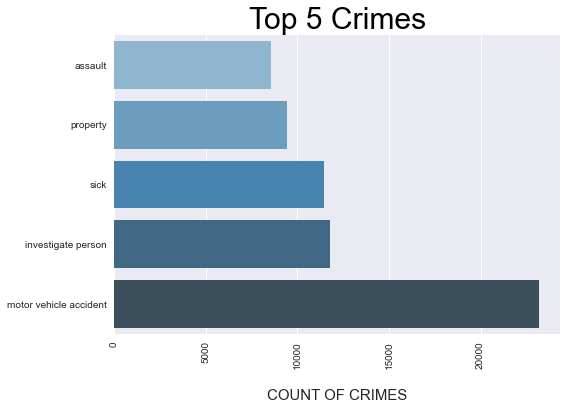

<Figure size 576x396 with 0 Axes>

In [159]:
# Set the style of the plot first
plt.style.use('seaborn')

# Filter out the Top 5 crimes
top_5_crimes = crime['offense_description'].value_counts().sort_values(ascending=False).head()

temp = crime.groupby('offense_description', as_index=False).agg({"INCIDENT_NUMBER": "count"})
temp = temp.sort_values(by=['INCIDENT_NUMBER'], ascending=False).head()
temp = temp.sort_values(by='INCIDENT_NUMBER', ascending=True)
sns.barplot(x='INCIDENT_NUMBER', y='offense_description', data=temp, palette="Blues_d")

# Work on the aestehtic appeal of the plot
plt.title("Top 5 Crimes", fontdict = {'fontsize': 30, 'fontname':'Arial', 'color': '#000000'})
plt.xlabel("\nCOUNT OF CRIMES", fontdict = {'fontsize': 15})
plt.ylabel("")
plt.xticks(rotation=90)
plt.show()
#plt.show(


In [81]:
# Frequency of the most occuring crimes over the year 2018

property_dict ={} # dictionary
mv_dict = {}
sick_dam = {}
investigate_person = {}
mv_accident = {}

months = crime["MONTH"].unique()
for month in months :
    property_dict[month]=0
    mv_dict[month]=0
    sick_dam[month]=0
    investigate_person[month]=0
    mv_accident[month]=0

for elem in crime[crime["offense_description"]=="assault"]["MONTH"]:
    if elem in property_dict.keys():
        property_dict[elem] += 1

for elem in crime[crime["offense_description"]=="property"]["MONTH"]:
    if elem in mv_dict.keys():
        mv_dict[elem] += 1
        
        
for elem in crime[crime["offense_description"]=="sick"]["MONTH"]:
    if elem in sick_dam.keys():
        sick_dam[elem] += 1
        
for elem in crime[crime["offense_description"]=="investigate person"]["MONTH"]:
    if elem in investigate_person.keys():
        investigate_person[elem] += 1
        
for elem in crime[crime["offense_description"]=="motor vehicle accident"]["MONTH"]:
    if elem in mv_accident.keys():
        mv_accident[elem] += 1
        
        
# Let's order the above dictionaries for proper plotting
months=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
theft_list = [(k,property_dict[k]) for k in months]
battery_list = [(k,mv_dict[k]) for k in months]
crim_dam_list = [(k,sick_dam[k]) for k in months]
assault_list = [(k,investigate_person[k]) for k in months]
dec_prac_list = [(k,mv_accident[k]) for k in months]

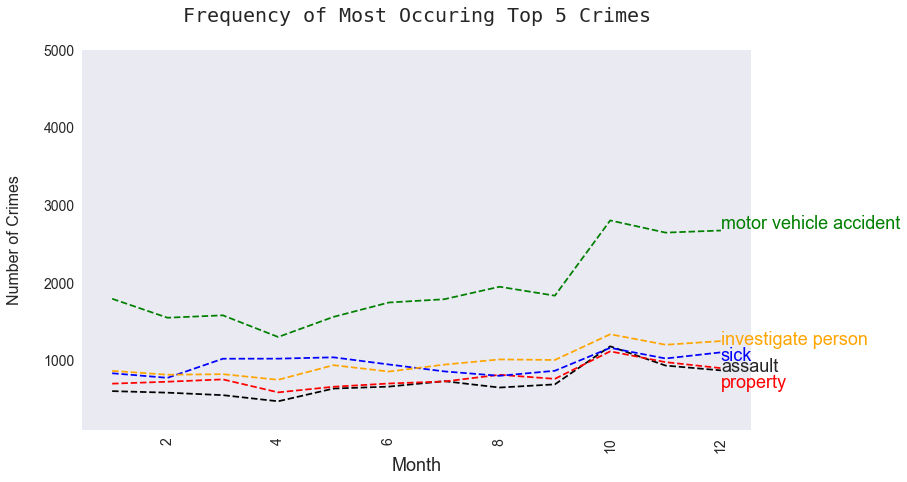

In [95]:
plt.style.use('seaborn-dark')
#sns.set(rc={'axes.facecolor':'A0D7E6', 'figure.facecolor':'ffffff'})
fig, ax = plt.subplots(figsize=(12,7))

ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  

# Setting the ticks only on the bottom and the left of the graph
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()   

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.ylim(100, 5000)

x = [z[0] for z in theft_list]
# print(x)
y = [z[1] for z in theft_list]
ax.plot(x,y, color="black")
ax.lines[0].set_linestyle("--")

x = [z[0] for z in battery_list]
y = [z[1] for z in battery_list]
ax.plot(x,y, color="red")
ax.lines[1].set_linestyle("--")

x = [z[0] for z in crim_dam_list]
y = [z[1] for z in crim_dam_list]
ax.plot(x,y, color="blue")
ax.lines[2].set_linestyle("--")


x = [z[0] for z in assault_list]
y = [z[1] for z in assault_list]
ax.plot(x,y, color="orange")
ax.lines[3].set_linestyle("--")

# x,y = zip(*dec_prac.items())
x = [z[0] for z in dec_prac_list]
y = [z[1] for z in dec_prac_list]
ax.plot(x,y, color="green")
ax.lines[4].set_linestyle("--")


for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    
plt.text(12,850,"assault",fontsize=18)
plt.text(12,650,"property",fontsize=18,color="red")
plt.text(12,1000,"sick",fontsize=18,color="blue")
plt.text(12,1200,"investigate person",fontsize=18,color="orange")
plt.text(12,2700,"motor vehicle accident",fontsize=18,color="green")

ax.set_title("Frequency of Most Occuring Top 5 Crimes\n",fontname="monospace", fontsize=20)
ax.set_xlabel("Month", fontsize=18)
ax.set_ylabel("Number of Crimes\n", fontsize=16)
    
plt.show()

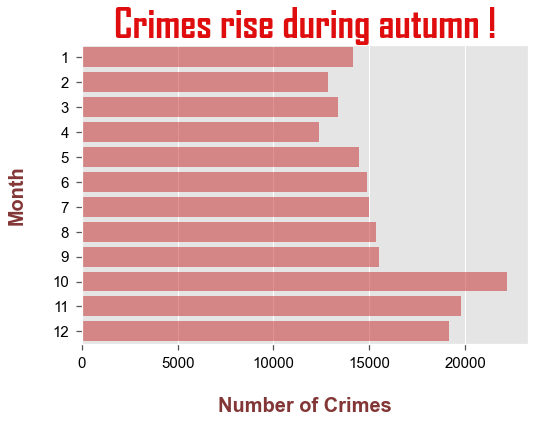

In [96]:
# Set plot style
plt.style.use('ggplot')
sns.set_context('notebook')

# Code to plot
sns.countplot(y='MONTH', data=crime, palette=["#DF0D0D"], order=[1,2,3,4,5,6,7,8,9,10,11,12], alpha=0.5)

# Aesthetic appeal of the plot 
plt.title("Crimes rise during autumn !", fontdict={'fontsize': 40, 'color': '#DF0D0D', 'fontname':'Agency FB'}, weight="bold")
plt.ylabel("Month\n", fontdict={'fontsize': 20}, weight="bold", color="#833636")
plt.xlabel("\nNumber of Crimes", fontdict={'fontsize': 20}, weight="bold", color="#833636")

plt.xticks(fontsize=15,color='black')
plt.yticks(fontsize=15, color='black')
plt.show()

The months of May, June, July and August have seen the most spike in crime rates in the city.
It is very important here that we are able to make an intuitive observation that Crime rises in the Autumn!

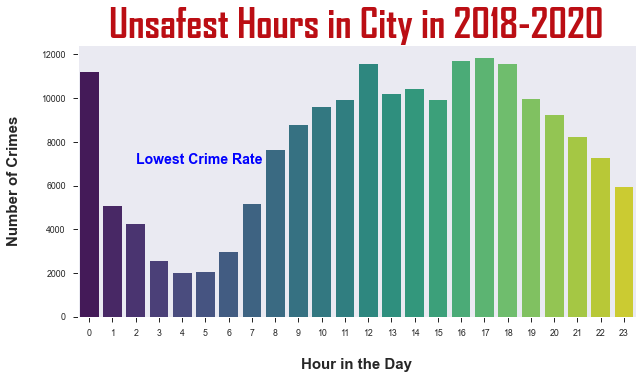

In [97]:
# Set plot style
plt.style.use('seaborn-dark')
sns.set_context('paper')

# Write code to plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='HOUR', data=crime, palette="viridis")

# Aesthetic appeal
plt.title("Unsafest Hours in City in 2018-2020", fontdict={'fontsize': 40, 'color': '#bb0e14','fontname':'Agency FB'}, weight="bold")
plt.xlabel("\nHour in the Day", fontdict={'fontsize': 15}, weight='bold')
plt.ylabel("Number of Crimes\n", fontdict={'fontsize': 15}, weight="bold")

# Add Text to the plot
plt.text(2, 7000, 'Lowest Crime Rate', fontdict={'fontsize': 14, 'color':"blue" }, weight='bold')

plt.show()

Crime rate slumps from midnight (00 hours) to 05 hours.
Well, Criminals need sleep too!

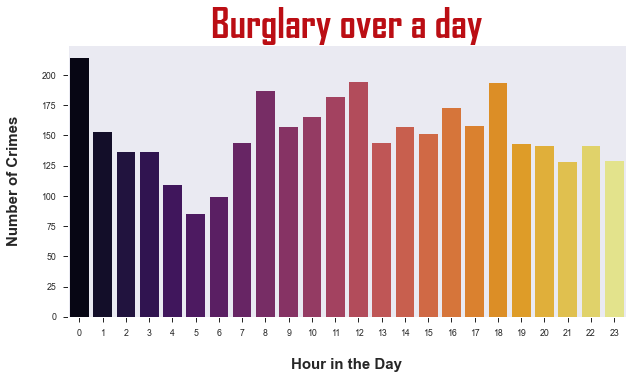

In [99]:
# analyse only for burglary
burglary_df = crime[crime['offense_description']=='burglary']
hours = [int(x) for x in list(burglary_df['HOUR'].unique())]
hours = sorted(hours)
# print(hours)

bur_cri = list(burglary_df['HOUR'].value_counts().sort_index())
# print(bur_cri)

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=hours, y=bur_cri, palette='inferno')

# Aesthetic appeal
plt.title("Burglary over a day", fontdict={'fontsize': 40, 'color': '#bb0e14','fontname':'Agency FB'}, weight="bold")
plt.xlabel("\nHour in the Day", fontdict={'fontsize': 15}, weight='bold')
plt.ylabel("Number of Crimes\n", fontdict={'fontsize': 15}, weight="bold")

# show plot
plt.show()

No. Your house is not at all safe froma burglary during the day. Infact, most burglaries happen when there still is sunlight!

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


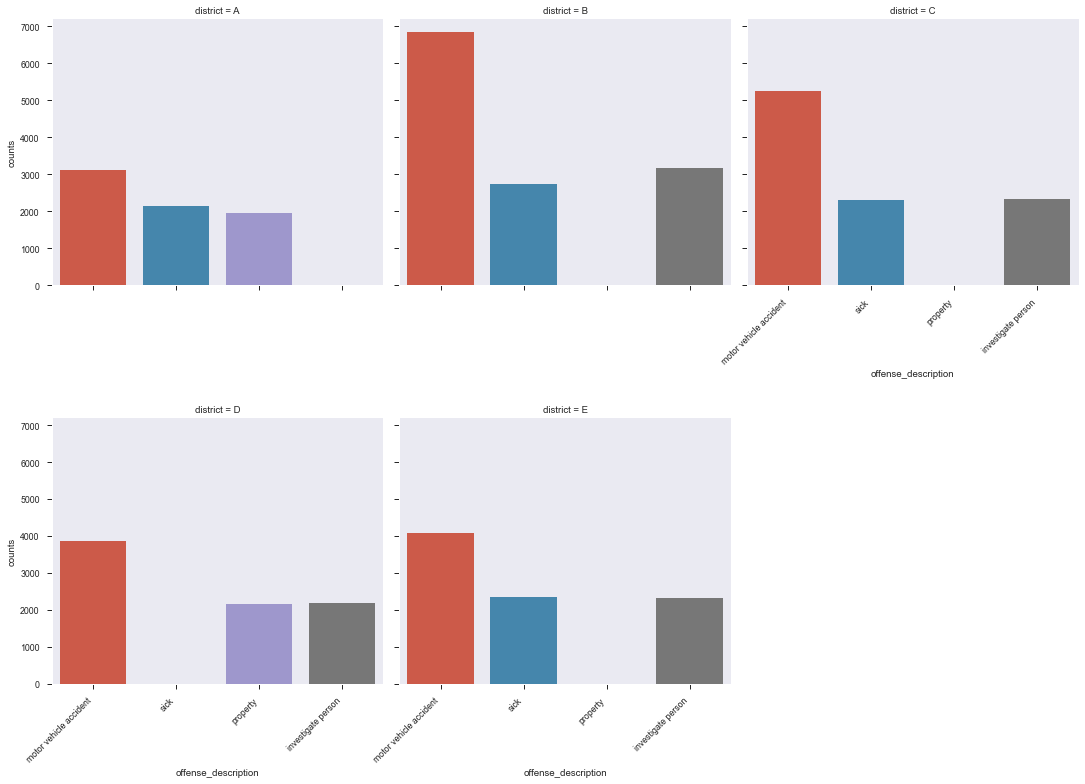

In [103]:
# location attributes = ['Location Description','Beat','District', 'Ward', 'Community Area','X Coordinate','Y Coordinate', 'Latitude', 'Longitude','Location']
%matplotlib inline
top = crime.groupby(['district', 'offense_description']).size().reset_index(name='counts').groupby('district').apply(lambda x: x.sort_values('counts',ascending=False).head(3))
#print(topk)

# factor plot to make multiple plots
g =sns.catplot("offense_description", y='counts', col="district", col_wrap=3,
                   data=top, kind='bar')
for ax in g.axes:
    plt.setp(ax.get_xticklabels(), visible=True, rotation=45, ha='right')

plt.subplots_adjust(hspace=0.5)


In [104]:
crime

,INCIDENT_NUMBER,OFFENSE_DESCRIPTION,DISTRICT,YEAR,MONTH,DAY_OF_WEEK,HOUR,district,offense_description
0,I192077559,INVESTIGATE PERSON,B3,2018,4,Monday,9,B,investigate person
1,I192077332,LARCENY ALL OTHERS,E18,2018,3,Tuesday,8,E,larceny all others
2,I192076660,HARASSMENT,E5,2018,10,Wednesday,12,E,harassment
3,I192075386,HARASSMENT,A1,2018,4,Monday,8,A,harassment
4,I192075335,PROPERTY - MISSING,D4,2018,1,Monday,0,D,property
...,...,...,...,...,...,...,...,...,...
70889,20063425,INVESTIGATE PROPERTY,A7,2020,9,Tuesday,0,A,investigate property
70890,20062356,FRAUD - IMPERSONATION,E18,2020,8,Friday,18,E,fraud
70891,20046400,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,B2,2020,7,Thursday,1,B,weapon violation
70892,20038446,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,B2,2020,6,Wednesday,1,B,weapon violation


# ---------------------------------------------------------------------------------------------

# Model

In [112]:
crime.to_csv('iykr.csv', index=False)

In [211]:
crime.to_csv('mantap.csv', index=False)